# SetUp

In [1]:
#Import packages and libraries

In [2]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install shap

In [6]:
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import pandas_profiling
import calendar
from seaborn import pairplot
from sklearn import (
    ensemble,
    model_selection,
    preprocessing,
    tree
)
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    cross_val_predict
)
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC
)
from yellowbrick.model_selection import (
    LearningCurve 
)
from imblearn.over_sampling import (
    SMOTE, ADASYN
)
from seaborn import diverging_palette

from pandas_profiling import ProfileReport

from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report
)

# import library for visualisations
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from IPython.display import Image

from pandas.plotting import scatter_matrix
from sklearn import metrics

# Data Import

In [8]:
clv = pd.read_csv(r"C:\Users\pnguy\OneDrive\Documents\GitHub\Auto_Insurance_Enterprise\Data\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [9]:
clv.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

# Exploratory Data Analysis

In [10]:
clv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [11]:
clv.shape

(9134, 24)

In [12]:
clv.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

Text(0, 0.5, 'Data type')

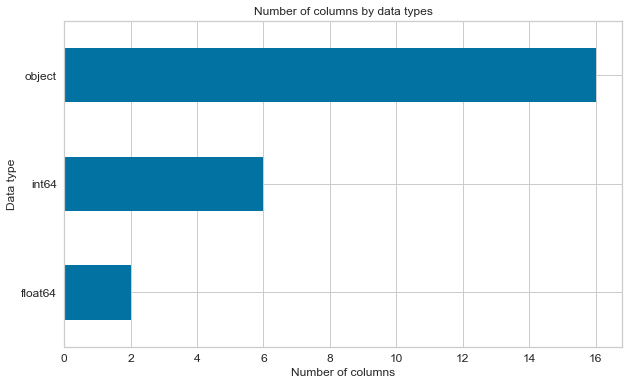

In [13]:
# Count of each type of column
clv.dtypes.value_counts().sort_values().plot(kind='barh',figsize=(10, 6),fontsize=12)
plt.title('Number of columns by data types', fontsize=12)
plt.xlabel('Number of columns', fontsize=12)
plt.ylabel('Data type', fontsize=12)

In [14]:
#number of categories in each column
clv.select_dtypes('object').apply(pd.Series.nunique, axis=0)

Customer             9134
State                   5
Response                2
Coverage                3
Education               5
Effective To Date      59
EmploymentStatus        5
Gender                  2
Location Code           3
Marital Status          3
Policy Type             3
Policy                  9
Renew Offer Type        4
Sales Channel           4
Vehicle Class           6
Vehicle Size            3
dtype: int64

**Summary statistics**

In [15]:
clv.describe()

Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

**Data Profiling**

In [16]:
# To retrieve the list of variables which are rejected due to high correlation
profile = ProfileReport(clv)
profile

Summarize dataset:   0%|          | 0/37 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Notes from pandas profiling report**

-No Missing Values 

-total variables 24

-total observations 9134

-no duplicate rows

-some outliers in monthly premium auto, custome rlifetime value and total claim amount

-Policy and Policy Type are highly correlated

In [17]:
# checking if the data is imbalanced and the distribution of categorical data

def vcounts(clv,colname):
    a = clv[colname].value_counts()
    return a

In [18]:
vcounts(clv,"Response")

#Data is highly imbalanced so would be applying SMOTE to imbalance data later in the analysis

No     7826
Yes    1308
Name: Response, dtype: int64

In [19]:
vcounts(clv,"State")

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

In [20]:
vcounts(clv,"Coverage")

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [21]:
vcounts(clv,"Education")

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [22]:
vcounts(clv,"EmploymentStatus")

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

In [23]:
vcounts(clv,"Gender")

F    4658
M    4476
Name: Gender, dtype: int64

In [24]:
vcounts(clv,"Location Code")

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

In [25]:
vcounts(clv,"Marital Status")

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64

In [26]:
vcounts(clv,"Policy Type")

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64

In [27]:
vcounts(clv,"Policy")

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

In [28]:
vcounts(clv,"Renew Offer Type")

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64

In [29]:
vcounts(clv,"Sales Channel")

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64

In [30]:
vcounts(clv,"Vehicle Class")

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

In [31]:
vcounts(clv,"Vehicle Size")

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

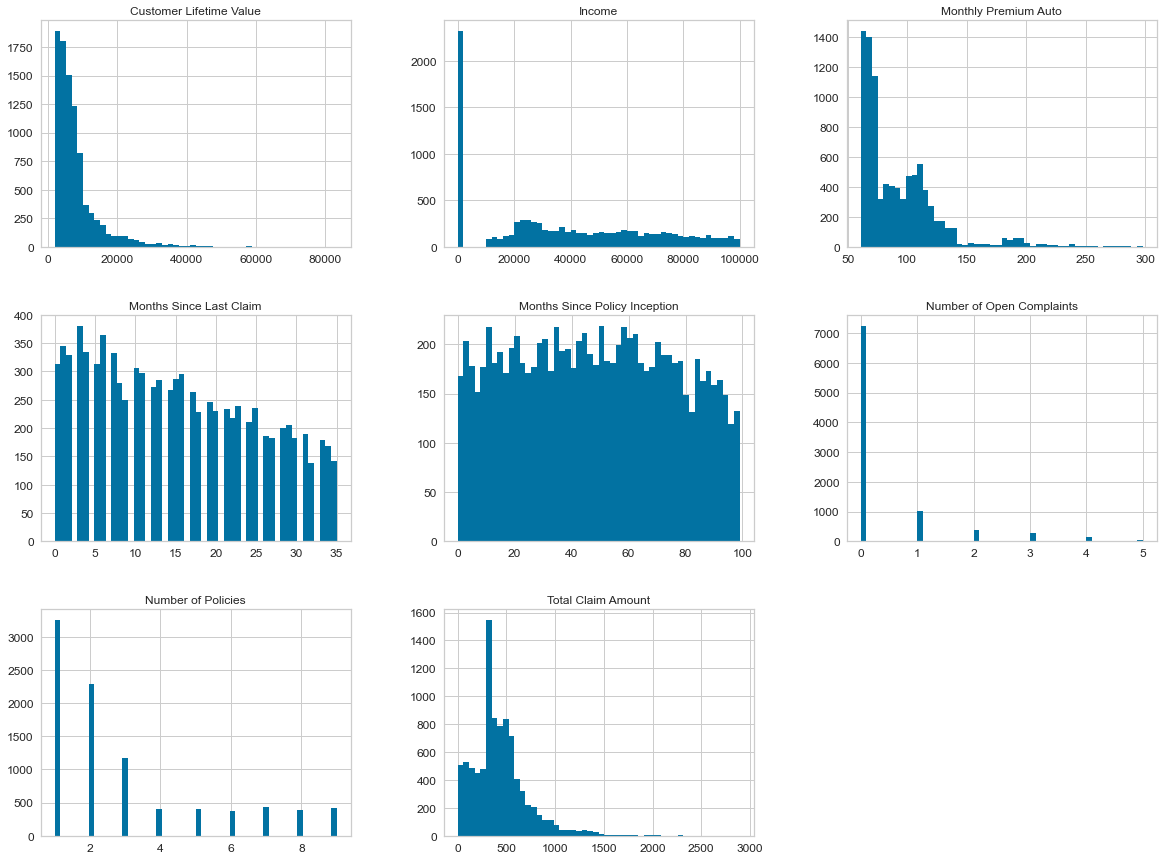

In [32]:
#histograms of continuous variables to check for outliers
attributes = ["Income","Customer Lifetime Value","Monthly Premium Auto","Months Since Last Claim","Months Since Policy Inception","Number of Open Complaints","Number of Policies","Total Claim Amount"]
%matplotlib inline
import matplotlib.pyplot as plt
clv[attributes].hist(bins=50, figsize=(20,15))
plt.show()

# Data Preprocessing and Preparation

In [33]:
# Removing variables from the data which don't have any predictive power and Policy Type since its highly correlated

clv_clean = clv.drop(columns=["Customer","Effective To Date","Policy Type"])

In [34]:
#Splitting Features into binary and remaining categorical

binary_feature = clv_clean.nunique()[clv_clean.nunique() == 2].keys().tolist()

In [35]:
binary_feature

['Response', 'Gender']

In [36]:
categorical_feature = [col for col in clv_clean.select_dtypes('object').columns.to_list() if col not in binary_feature]

In [37]:
categorical_feature

['State',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Location Code',
 'Marital Status',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [38]:
# Feature Engineering  - dummyfying the binary and categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in binary_feature:
    clv_clean[i] = le.fit_transform(clv_clean[i])

In [39]:
clv_clean = pd.get_dummies(clv_clean,columns=['State','Coverage','Education','EmploymentStatus','Location Code',
                                              'Marital Status','Policy','Renew Offer Type','Sales Channel','Vehicle Class',
                                             'Vehicle Size'])

In [40]:
clv_clean.columns

Index(['Customer Lifetime Value', 'Response', 'Gender', 'Income',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount', 'State_Arizona',
       'State_California', 'State_Nevada', 'State_Oregon', 'State_Washington',
       'Coverage_Basic', 'Coverage_Extended', 'Coverage_Premium',
       'Education_Bachelor', 'Education_College', 'Education_Doctor',
       'Education_High School or Below', 'Education_Master',
       'EmploymentStatus_Disabled', 'EmploymentStatus_Employed',
       'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
       'EmploymentStatus_Unemployed', 'Location Code_Rural',
       'Location Code_Suburban', 'Location Code_Urban',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Policy_Corporate L1', 'Policy_Corporate L2',
       'Policy_Corporate L3', 'Policy_Personal L1', 'Policy_Personal L2',


In [41]:
clv_clean.head()

Customer Lifetime Value  Response  Gender  Income  Monthly Premium Auto  \
0              2763.519279         0       0   56274                    69   
1              6979.535903         0       0       0                    94   
2             12887.431650         0       0   48767                   108   
3              7645.861827         0       1       0                   106   
4              2813.692575         0       1   43836                    73   

   Months Since Last Claim  Months Since Policy Inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   Number of Open Complaints  Number of Policies  Total Claim Amount  ...  \
0                          0                   1          384.811147  ...   
1                          0                   8         1131.464935  ...   
2                          0                   2          566.472247  ...   
3                          0                   7          529.881344  ...   
4                          0                   1          138.130879  ...   

   Sales Channel_Web  Vehicle Class_Four-Door Car  Vehicle Class_Luxury Car  \
0                  0                            0                         0   
1                  0                            1                         0   
2                  0                            0                         0   
3                  0                            0                         0   
4                  0                            1                         0   

   Vehicle Class_Luxury SUV  Vehicle Class_SUV  Vehicle Class_Sports Car  \
0                         0                  0                         0   
1                         0                  0                         0   
2                         0                  0                         0   
3                         0                  1                         0   
4                         0                  0                         0   

   Vehicle Class_Two-Door Car  Vehicle Size_Large  Vehicle Size_Medsize  \
0                           1                   0                     1   
1                           0                   0                     1   
2                           1                   0                     1   
3                           0                   0                     1   
4                           0                   0                     1   

   Vehicle Size_Small  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 60 columns]

<AxesSubplot:>

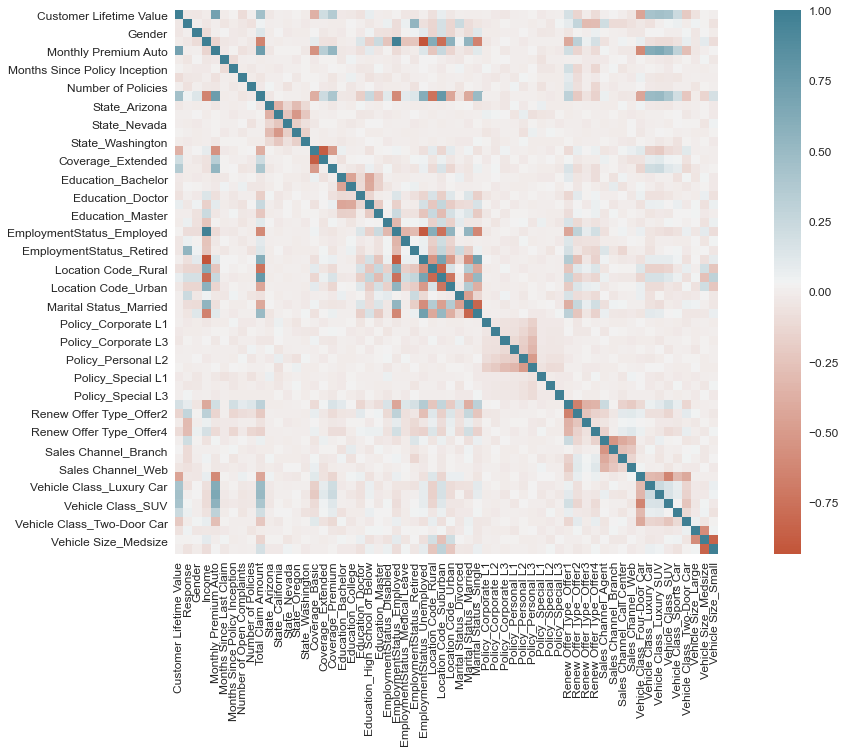

In [44]:
# detecting correlations between variables
data_corr = clv_clean.corr()

plt.figure(figsize=(20,10))
sns.heatmap(data_corr.corr(), cmap = sns.diverging_palette(20, 220, n=200),square=True)

In [45]:
data_corr["Response"].sort_values(ascending=False)

Response                          1.000000
EmploymentStatus_Retired          0.295645
Renew Offer Type_Offer2           0.177504
Location Code_Suburban            0.116990
Marital Status_Divorced           0.112042
Sales Channel_Agent               0.108201
Renew Offer Type_Offer1           0.036028
Vehicle Size_Large                0.033370
Vehicle Class_Sports Car          0.028869
Policy_Special L3                 0.024276
Vehicle Class_SUV                 0.024230
EmploymentStatus_Medical Leave    0.023761
EmploymentStatus_Disabled         0.021262
Education_Doctor                  0.018152
Total Claim Amount                0.016877
Education_College                 0.016526
Education_Master                  0.015898
Vehicle Size_Medsize              0.015105
Income                            0.011932
Monthly Premium Auto              0.010966
Policy_Special L1                 0.009405
Vehicle Class_Luxury SUV          0.008122
Policy_Personal L1                0.006780
Policy_Corp

**Splitting the data into Target and independent variables**

In [46]:
X = clv_clean.drop(columns=["Response"])
y = clv_clean["Response"]

**Splitting dataset into training and testing**

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [48]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

6393
2741
6393
2741


**Standardising Data**

In [49]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X_train = standardizer.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns = X.columns)
X_test = standardizer.transform(X_test)
X_test = pd.DataFrame(X_test,columns = X.columns)

# Feature Selection

In [50]:
#Recursive Feature Elimination Method
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rfe = RFE(rf, n_features_to_select=25)
model_l = rfe.fit(X_train, y_train)
model_l_df = pd.DataFrame(list(zip(X_train.columns,model_l.ranking_)), columns = ['predictor','ranking'])
model_l_df

predictor  ranking
0          Customer Lifetime Value        1
1                           Gender        1
2                           Income        1
3             Monthly Premium Auto        1
4          Months Since Last Claim        1
5    Months Since Policy Inception        1
6        Number of Open Complaints        1
7               Number of Policies        1
8               Total Claim Amount        1
9                    State_Arizona       21
10                State_California       17
11                    State_Nevada       29
12                    State_Oregon       19
13                State_Washington       25
14                  Coverage_Basic        1
15               Coverage_Extended        6
16                Coverage_Premium       16
17              Education_Bachelor        1
18               Education_College        1
19                Education_Doctor       13
20  Education_High School or Below        1
21                Education_Master        9
22       EmploymentStatus_Disabled       24
23       EmploymentStatus_Employed        3
24  EmploymentStatus_Medical Leave       22
25        EmploymentStatus_Retired        1
26     EmploymentStatus_Unemployed       12
27             Location Code_Rural       27
28          Location Code_Suburban        1
29             Location Code_Urban       14
30         Marital Status_Divorced        1
31          Marital Status_Married        1
32           Marital Status_Single        1
33             Policy_Corporate L1       32
34             Policy_Corporate L2       28
35             Policy_Corporate L3       26
36              Policy_Personal L1       23
37              Policy_Personal L2       20
38              Policy_Personal L3       15
39               Policy_Special L1       35
40               Policy_Special L2       34
41               Policy_Special L3       30
42         Renew Offer Type_Offer1        1
43         Renew Offer Type_Offer2        1
44         Renew Offer Type_Offer3        2
45         Renew Offer Type_Offer4        7
46             Sales Channel_Agent        1
47            Sales Channel_Branch        1
48       Sales Channel_Call Center        5
49               Sales Channel_Web       10
50     Vehicle Class_Four-Door Car        1
51        Vehicle Class_Luxury Car       33
52        Vehicle Class_Luxury SUV       31
53               Vehicle Class_SUV       11
54        Vehicle Class_Sports Car       18
55      Vehicle Class_Two-Door Car        4
56              Vehicle Size_Large        1
57            Vehicle Size_Medsize        1
58              Vehicle Size_Small        8

In [51]:
model_l_df.to_csv(r"C:\Users\pnguy\OneDrive\Documents\GitHub\Auto_Insurance_Enterprise\Data\features1.csv")

In [52]:
#removing useless predictors

X_train = X_train.drop(columns = ['Renew Offer Type_Offer3','EmploymentStatus_Employed','Vehicle Class_Two-Door Car','Sales Channel_Call Center','Coverage_Extended','Renew Offer Type_Offer4','Vehicle Size_Small','Education_Master','Sales Channel_Web','Vehicle Class_SUV','EmploymentStatus_Unemployed','Education_Doctor','Location Code_Urban','Policy_Personal L3','Coverage_Premium','State_California','Vehicle Class_Sports Car','State_Oregon','Policy_Personal L2','State_Arizona','EmploymentStatus_Medical Leave','Policy_Personal L1','EmploymentStatus_Disabled','State_Washington','Policy_Corporate L3','Location Code_Rural','Policy_Corporate L2','State_Nevada','Policy_Special L3','Vehicle Class_Luxury SUV','Policy_Corporate L1','Vehicle Class_Luxury Car','Policy_Special L2','Policy_Special L1'])
X_test = X_test.drop(columns = ['Renew Offer Type_Offer3','EmploymentStatus_Employed','Vehicle Class_Two-Door Car','Sales Channel_Call Center','Coverage_Extended','Renew Offer Type_Offer4','Vehicle Size_Small','Education_Master','Sales Channel_Web','Vehicle Class_SUV','EmploymentStatus_Unemployed','Education_Doctor','Location Code_Urban','Policy_Personal L3','Coverage_Premium','State_California','Vehicle Class_Sports Car','State_Oregon','Policy_Personal L2','State_Arizona','EmploymentStatus_Medical Leave','Policy_Personal L1','EmploymentStatus_Disabled','State_Washington','Policy_Corporate L3','Location Code_Rural','Policy_Corporate L2','State_Nevada','Policy_Special L3','Vehicle Class_Luxury SUV','Policy_Corporate L1','Vehicle Class_Luxury Car','Policy_Special L2','Policy_Special L1'])

**Dealing with imbalanced data**

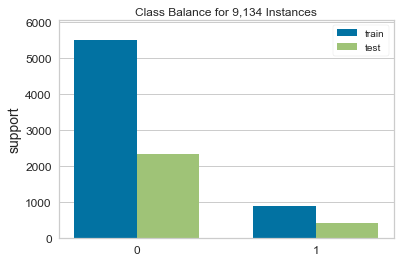

<AxesSubplot:title={'center':'Class Balance for 9,134 Instances'}, ylabel='support'>

In [53]:
from yellowbrick.target import ClassBalance

# Instantiate the visualizer
visualizer = ClassBalance(labels=["0", "1"])

visualizer.fit(y_train, y_test)        # Fit the data to the visualizer
visualizer.show()

In [54]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [55]:
#ROC curve
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [56]:
#PR Curve
def plot_pr_curve(precision, recall, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')   
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

In [57]:
#Classification Score
def clf_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train == False:
        print("Validation Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        
        precision, recall, _ = precision_recall_curve(y_test, clf.predict(X_test))
        average_precision = average_precision_score(y_test, clf.predict(X_test))
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_test, clf.predict(X_test))
        roc_auc = roc_auc_score(y_test, clf.predict(X_test))
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))
        plot_confusion_matrix(clf,  X_test, clf.predict(X_test))
        print("End of validation Result\n")

In [58]:
#classification matrix
def evaluation_metrics(y_actual, y_pred):
            
        precision, recall, _ = precision_recall_curve(y_actual, y_pred)
        average_precision = average_precision_score(y_actual, y_pred)
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_actual, y_pred)
        roc_auc = roc_auc_score(y_actual, y_pred)
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_actual, y_pred)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_actual, y_pred)))

In [59]:
gc.collect()

451569

# Building Models with fine tunings

**Logistic Regression Model**

In [60]:
#logistic Regression Model
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=0)

In [61]:
#Fine tuning the model using Grid Search

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [100], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001], 'solver':['liblinear']}
model = GridSearchCV(logit,param_grid,scoring = "accuracy",cv=5,verbose = 0)
result = model.fit(X_train_sm,y_train_sm)
model.cv_results_
df_logit = pd.DataFrame(model.cv_results_)
df_logit

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.021015      0.000875         0.001934    5.337659e-04     0.1   
1        0.018261      0.001128         0.001601    4.900768e-04     0.1   
2        0.022477      0.000463         0.002011    2.095774e-05     0.1   
3        0.020590      0.000374         0.001601    4.897457e-04     0.5   
4        0.018471      0.000855         0.002001    2.780415e-07     0.5   
5        0.023809      0.000752         0.002001    4.264961e-07     0.5   
6        0.021983      0.000677         0.002001    6.321840e-04       1   
7        0.020414      0.001312         0.001534    4.514835e-04       1   
8        0.024607      0.002153         0.001801    3.999474e-04       1   
9        0.022205      0.001938         0.001804    4.019354e-04      10   
10       0.019812      0.001173         0.002001    3.015783e-07      10   
11       0.024208      0.001572         0.001401    4.898431e-04      10   
12       0.022004      0.001096         0.001601    4.902129e-04      50   
13       0.020219      0.001472         0.001818    4.101596e-04      50   
14       0.024808      0.003122         0.002001    6.332394e-04      50   
15       0.022096      0.000871         0.001801    4.001383e-04     100   
16       0.020151      0.001813         0.001401    4.901545e-04     100   
17       0.023900      0.000907         0.001944    5.555443e-04     100   

   param_fit_intercept param_intercept_scaling param_max_iter param_penalty  \
0                 True                       1            100            l2   
1                 True                       1            100            l2   
2                 True                       1            100            l2   
3                 True                       1            100            l2   
4                 True                       1            100            l2   
5                 True                       1            100            l2   
6                 True                       1            100            l2   
7                 True                       1            100            l2   
8                 True                       1            100            l2   
9                 True                       1            100            l2   
10                True                       1            100            l2   
11                True                       1            100            l2   
12                True                       1            100            l2   
13                True                       1            100            l2   
14                True                       1            100            l2   
15                True                       1            100            l2   
16                True                       1            100            l2   
17                True                       1            100            l2   

   param_solver param_tol                                             params  \
0     liblinear     1e-05  {'C': 0.1, 'fit_intercept': True, 'intercept_s...   
1     liblinear    0.0001  {'C': 0.1, 'fit_intercept': True, 'intercept_s...   
2     liblinear     1e-06  {'C': 0.1, 'fit_intercept': True, 'intercept_s...   
3     liblinear     1e-05  {'C': 0.5, 'fit_intercept': True, 'intercept_s...   
4     liblinear    0.0001  {'C': 0.5, 'fit_intercept': True, 'intercept_s...   
5     liblinear     1e-06  {'C': 0.5, 'fit_intercept': True, 'intercept_s...   
6     liblinear     1e-05  {'C': 1, 'fit_intercept': True, 'intercept_sca...   
7     liblinear    0.0001  {'C': 1, 'fit_intercept': True, 'intercept_sca...   
8     liblinear     1e-06  {'C': 1, 'fit_intercept': True, 'intercept_sca...   
9     liblinear     1e-05  {'C': 10, 'fit_intercept': True, 'intercept_sc...   
10    liblinear    0.0001  {'C': 10, 'fit_intercept': True, 'intercept_sc...   
11    liblinear     1e-06  {'C': 10, 'fit_intercept': True, 'intercept_sc...   
12    liblinear  

In [62]:
print(f'Best Accuracy: {result.best_score_} for {result.best_params_}')

Best Accuracy: 0.7463209894272317 for {'C': 0.5, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05}


In [63]:
#Fitting the Model and getting accuracy, precision and recall scores

model_lr = LogisticRegression(C=50, max_iter = 100,tol = 0.00001)
model_lr.fit(X_train_sm, y_train_sm)
y_pred_lr = model_lr.predict(X_test)
lr_corr = metrics.confusion_matrix(y_test, y_pred_lr)
print("Accuracy_Score: {}".format(accuracy_score(y_test,y_pred_lr)))
print("Precision_Score: {}".format(precision_score(y_test,y_pred_lr)))
print("Recall_Score: {}".format(recall_score(y_test,y_pred_lr)))
print("F1_Score: {}".format(metrics.f1_score(y_test,y_pred_lr)))

Accuracy_Score: 0.7015687705217074
Precision_Score: 0.2967479674796748
Recall_Score: 0.6985645933014354
F1_Score: 0.4165477888730385


**Classification Report**

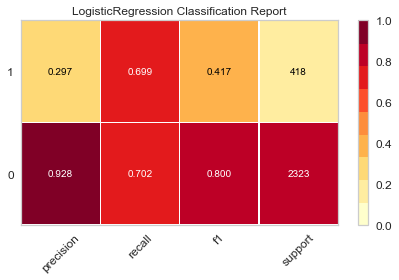

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [64]:
from yellowbrick.classifier import ClassificationReport

classes = ["0", "1"]

visualizer = ClassificationReport(
    model_lr, classes=classes, support=True, is_fitted=True
)

visualizer.fit(X_train_sm, y_train_sm)
visualizer.score(X_test, y_test)   
visualizer.show()

**Confusion Matrix**

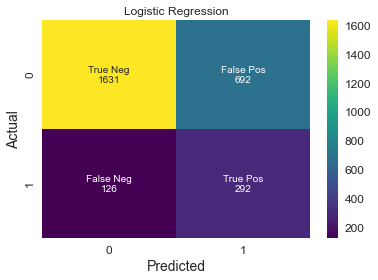

In [65]:
# Confusion Matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                lr_corr.flatten()]

labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(lr_corr, fmt = '',cmap = 'viridis', annot=labels);
title = "Logistic Regression"
ylabel = "Actual"
xlabel = "Predicted"
plt.title(title)
plt.ylabel(ylabel)
plt.xlabel(xlabel);

**PR Curve**

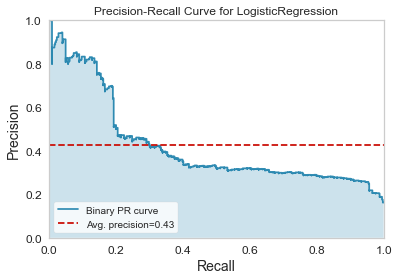

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [66]:
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(model_lr, is_fitted=True)
viz.fit(X_train_sm, y_train_sm)
viz.score(X_test, y_test)
viz.show()

**ROC-AUC**

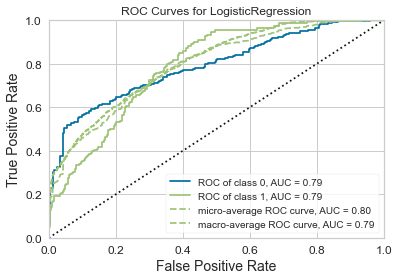

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [67]:
visualizer = ROCAUC(
    model_lr, classes=classes, is_fitted=True
)

visualizer.fit(X_train_sm, y_train_sm)
visualizer.score(X_test, y_test)
visualizer.show()

**Discrimintation Threshold**

This takes quite some time to run, so run it only when you have to write about the business insights.

In [68]:
#from yellowbrick.classifier import DiscriminationThreshold

#visualizer = DiscriminationThreshold(model_lr, is_fitted=True)

#visualizer.fit(X_train_sm, y_train_sm)
#visualizer.poof()

**Random Forest Model**

In [69]:
#Random Forest Classifier

#Model Built

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)
param_grid = { 
    'n_estimators': [200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,10,12],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
rfc_result = CV_rfc.fit(X_train_sm, y_train_sm)
CV_rfc.cv_results_
df_rfc = pd.DataFrame(CV_rfc.cv_results_)
df_rfc

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.752313      0.015647         0.032461        0.000783   
1        1.887329      0.024952         0.079418        0.000490   
2        0.755479      0.019354         0.032592        0.000463   
3        1.898639      0.064510         0.079523        0.001598   
4        0.665206      0.006554         0.032183        0.000216   
5        1.859679      0.122510         0.087449        0.011104   
6        1.054193      0.036987         0.040583        0.000499   
7        2.626999      0.130379         0.094170        0.002812   
8        1.063186      0.047012         0.042298        0.004900   
9        2.732647      0.188175         0.095487        0.003857   
10       0.927845      0.063434         0.040083        0.002851   
11       2.328270      0.149635         0.095064        0.002596   
12       1.323645      0.025251         0.047905        0.002006   
13       3.065481      0.037047         0.113093        0.005000   
14       1.195963      0.025068         0.044169        0.000431   
15       3.078006      0.143311         0.110060        0.007121   
16       1.071046      0.034784         0.047799        0.003436   
17       2.577520      0.042032         0.111764        0.006273   
18       1.303336      0.015869         0.050453        0.001344   
19       3.240719      0.044943         0.122095        0.001106   
20       1.310390      0.023979         0.050362        0.000670   
21       3.525751      0.013877         0.133194        0.002172   
22       1.269697      0.029539         0.055529        0.004241   
23       3.109371      0.015242         0.126354        0.002097   
24       1.552025      0.033466         0.058146        0.001381   
25       3.839643      0.034503         0.139924        0.004992   
26       1.557128      0.020412         0.057678        0.001846   
27       3.865543      0.041537         0.140870        0.004769   
28       1.357769      0.035186         0.057220        0.001992   
29       3.400806      0.049583         0.142375        0.003412   
30       0.997591      0.007430         0.034181        0.001178   
31       2.490543      0.044659         0.084500        0.003948   
32       0.990032      0.018667         0.033169        0.000362   
33       2.500649      0.026104         0.082761        0.001906   
34       0.864615      0.030512         0.033554        0.001495   
35       2.174527      0.040946         0.085714        0.003736   
36       1.282910      0.023389         0.039358        0.001695   
37       3.231399      0.022157         0.100696        0.005799   
38       1.297820      0.022864         0.040632        0.003236   
39       3.232768      0.044179         0.095995        0.003515   
40       1.111872      0.039968         0.040828        0.001844   
41       2.828198      0.038932         0.099653        0.005183   
42       1.528611      0.032465         0.048345        0.001382   
43       3.863265      0.059067         0.113048        0.004564   
44       1.511745      0.024032         0.047263        0.002578   
45       3.863774      0.058672         0.113485        0.002909   
46       1.343724      0.024272         0.045851        0.001384   
47       3.317090      0.040862         0.140882        0.052675   
48       1.726108      0.039500         0.052738        0.002239   
49       4.364815      0.074367         0.128554        0.005303   
50       1.722495      0.042362         0.052792        0.001829   
51       4.339042      0.083060         0.126462        0.005793   
52       1.479737      0.035485         0.052211        0.003432   
53       3.751294      0.071122         0.127884        0.002289   
54       1.884281      0.052579         0.058956        0.003406   
55       4.714811      0.087777         0.141274        0.008182   
56       1.845469      0.069199         0.057118        0.003296   
57       4.717445      0.044808         0.138732        0.00

In [70]:
print(f'Best Accuracy: {rfc_result.best_score_} for {rfc_result.best_params_}')

Best Accuracy: 0.9840998291173898 for {'criterion': 'gini', 'max_depth': 12, 'max_features': 'log2', 'n_estimators': 500}


In [71]:
# Fitting the Model and getting accuracy, precision and recall scores

model_rfc = RandomForestClassifier(criterion='gini',max_depth=12,max_features='log2',n_estimators=500)
model_rfc.fit(X_train_sm, y_train_sm)
y_pred_rfc = model_rfc.predict(X_test)
rfc_corr = metrics.confusion_matrix(y_test, y_pred_rfc)
print("Accuracy_Score: {}".format(accuracy_score(y_test,y_pred_rfc)))
print("Precision_Score: {}".format(precision_score(y_test,y_pred_rfc)))
print("Recall_Score: {}".format(recall_score(y_test,y_pred_rfc)))
print("F1_Score: {}".format(metrics.f1_score(y_test,y_pred_rfc)))

Accuracy_Score: 0.973732214520248
Precision_Score: 0.8665254237288136
Recall_Score: 0.9784688995215312
F1_Score: 0.9191011235955056


**Classification Report**

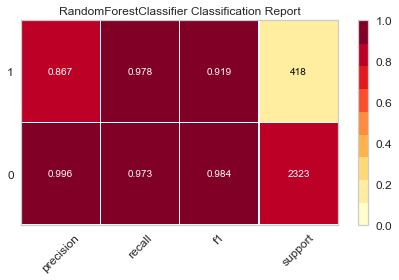

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [72]:
from yellowbrick.classifier import ClassificationReport

classes2 = ["0", "1"]

visualizer2 = ClassificationReport(
    model_rfc, classes=classes2, support=True, is_fitted=True
)

visualizer2.fit(X_train_sm, y_train_sm)
visualizer2.score(X_test, y_test)   
visualizer2.show()

**Confusion Matrix**

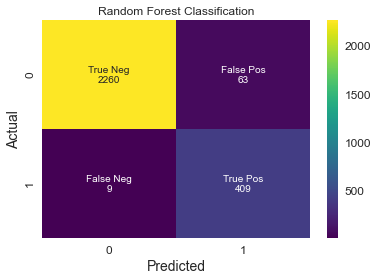

In [73]:
# Confusion Matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                rfc_corr.flatten()]

labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(rfc_corr, fmt = '',cmap = 'viridis', annot=labels);
title = "Random Forest Classification"
ylabel = "Actual"
xlabel = "Predicted"
plt.title(title)
plt.ylabel(ylabel)
plt.xlabel(xlabel);

**PR Curve**

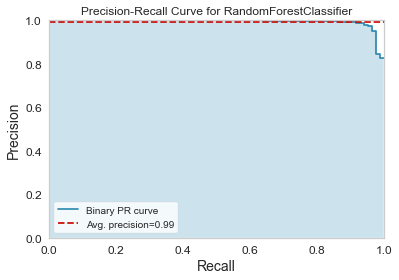

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [74]:
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and show it
viz2 = PrecisionRecallCurve(model_rfc, is_fitted=True)
viz2.fit(X_train_sm, y_train_sm)
viz2.score(X_test, y_test)
viz2.show()

**ROC-AUC**

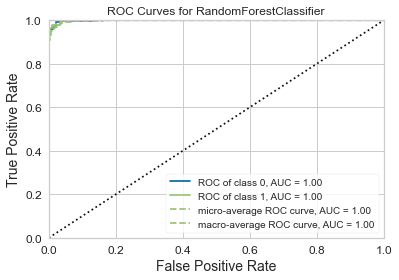

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [75]:
visualizerroc2 = ROCAUC(
    model_rfc, classes=classes2, is_fitted=True
)

visualizerroc2.fit(X_train_sm, y_train_sm)
visualizerroc2.score(X_test, y_test)
visualizerroc2.show()

**Discrimintation Threshold**


This takes quite some time to run, so run it only when you have to write about the business insights.

In [76]:
#visualizer = DiscriminationThreshold(model_rfc, is_fitted=True)

#visualizer.fit(X_train_sm, y_train_sm)
#visualizer.poof()

**Feature Importance**

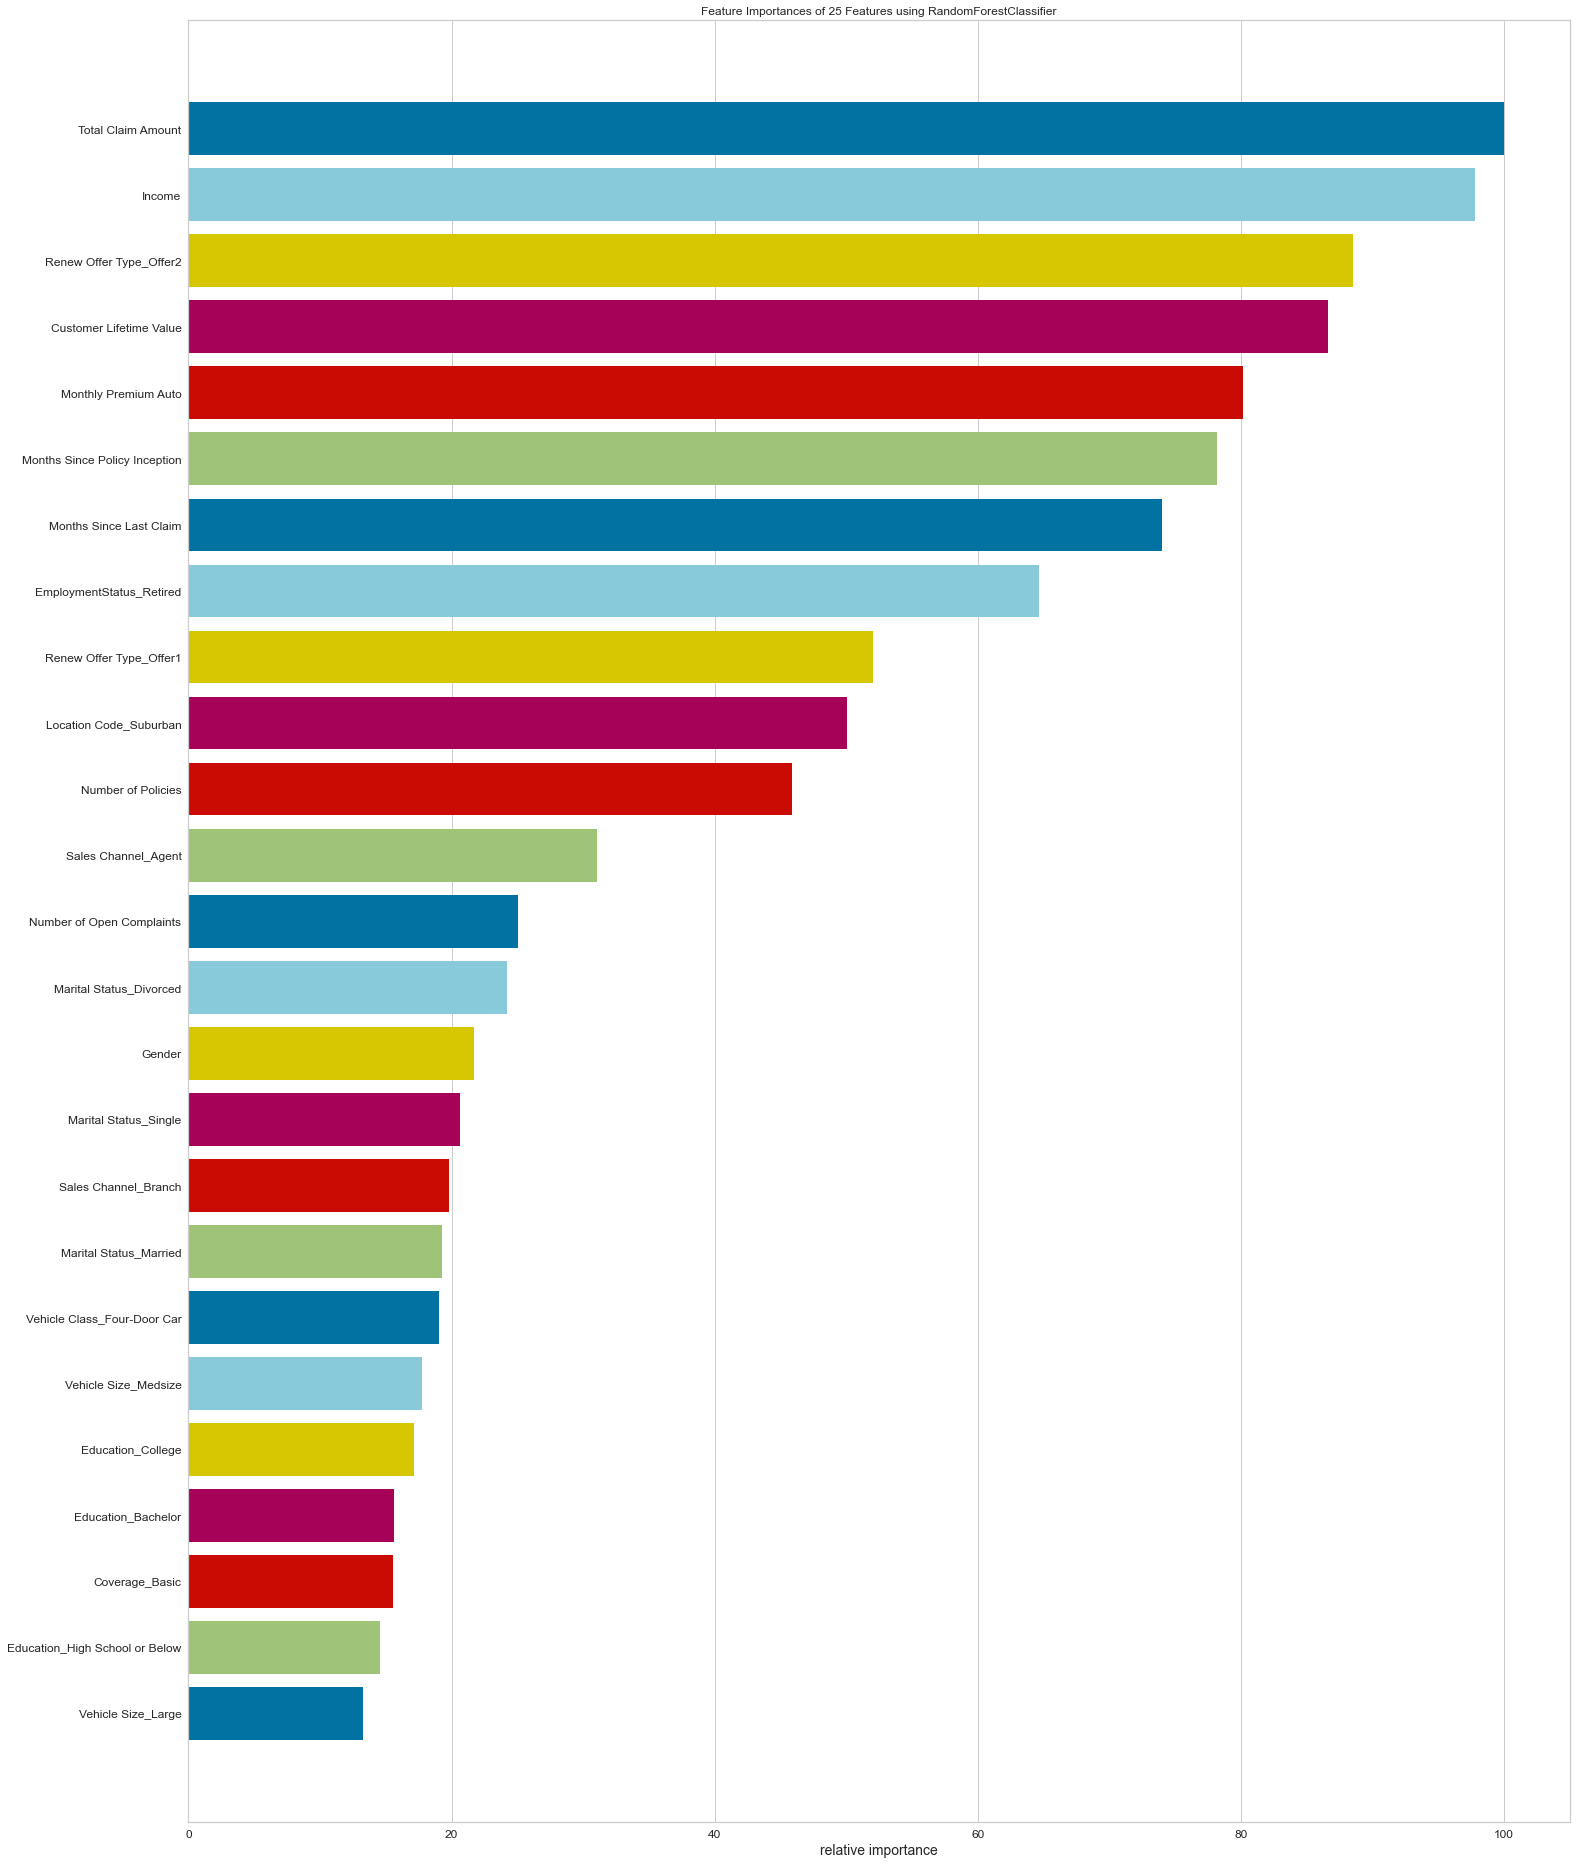

<AxesSubplot:title={'center':'Feature Importances of 25 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [77]:
from yellowbrick.model_selection import FeatureImportances

fig = plt.figure(figsize=(22, 26))
viz = FeatureImportances(model_rfc, labels=X_train_sm.columns)
viz.fit(X_train_sm, y_train_sm)
viz.poof()

**Gradient Boosting Classifier Model**

In [78]:
# Gradient Boosting Classifier

# Model Built

from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(random_state=0)
parameters = {
    "learning_rate": [0.01, 0.025, 0.05,],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "n_estimators":[200,500]
    }

clf = GridSearchCV(estimator=gbt, param_grid=parameters, cv=5,verbose = 0)
gbt_result = clf.fit(X_train_sm, y_train_sm)
clf.cv_results_
df_gbt = pd.DataFrame(clf.cv_results_)
df_gbt

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.631292      0.015346         0.008447        0.000885   
1        1.690247      0.022612         0.017379        0.000805   
2        0.817328      0.022518         0.008799        0.000752   
3        2.086043      0.023038         0.018669        0.000518   
4        1.185430      0.023996         0.013524        0.000918   
5        3.005255      0.039030         0.027995        0.000605   
6        1.326996      0.004255         0.012803        0.000749   
7        3.274417      0.091446         0.028278        0.001155   
8        2.520559      0.019639         0.023389        0.001366   
9        6.237847      0.076629         0.053676        0.001790   
10       2.697717      0.024506         0.022932        0.001068   
11       6.857301      0.062858         0.053940        0.001564   
12       0.695124      0.014859         0.008132        0.000179   
13       1.742596      0.026812         0.017090        0.000172   
14       0.802210      0.022125         0.008636        0.000688   
15       2.016794      0.037721         0.017202        0.000249   
16       1.139771      0.018789         0.012203        0.000400   
17       2.896433      0.040571         0.028379        0.001455   
18       1.304631      0.015282         0.011989        0.000397   
19       3.285039      0.089034         0.027071        0.001000   
20       2.507856      0.016818         0.023131        0.000827   
21       6.211699      0.077631         0.053006        0.001109   
22       2.724355      0.048747         0.023198        0.000404   
23       6.838563      0.081477         0.053095        0.001130   
24       0.679422      0.021126         0.008688        0.000582   
25       1.740280      0.026647         0.017202        0.000751   
26       0.801686      0.026259         0.008307        0.000750   
27       2.026579      0.042233         0.016859        0.001281   
28       1.125164      0.016201         0.012403        0.000490   
29       2.890195      0.046098         0.027856        0.000660   
30       1.309053      0.016052         0.012355        0.000536   
31       3.313776      0.045836         0.028020        0.002056   
32       2.513831      0.050043         0.023609        0.001018   
33       6.326112      0.043836         0.053061        0.000674   
34       2.715994      0.044871         0.023449        0.001202   
35       6.863773      0.069080         0.054798        0.003070   

   param_learning_rate param_max_depth param_max_features param_n_estimators  \
0                 0.01               3               log2                200   
1                 0.01               3               log2                500   
2                 0.01               3               sqrt                200   
3                 0.01               3               sqrt                500   
4                 0.01               5               log2                200   
5                 0.01               5               log2                500   
6                 0.01               5               sqrt                200   
7                 0.01               5               sqrt                500   
8                 0.01               8               log2                200   
9                 0.01               8               log2                500   
10                0.01               8               sqrt                200   
11                0.01               8               sqrt                500   
12               0.025               3               log2                200   
13               0.025               3               log2                500   
14               0.025               3               sqrt                200   
15               0.025               3               sqrt                500   
16               0.025               5               log2                200   
17               0.025               5         

In [79]:
print(f'Best Accuracy: {gbt_result.best_score_} for {gbt_result.best_params_}')

Best Accuracy: 0.9961842544529137 for {'learning_rate': 0.05, 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 500}


In [80]:
#Fitting the Model and getting accuracy, precision and recall scores

model_gbt = GradientBoostingClassifier(learning_rate=0.05,max_depth=8,max_features='sqrt',n_estimators=500)
model_gbt.fit(X_train_sm, y_train_sm)
y_pred_gbt = model_gbt.predict(X_test)
gbt_corr = metrics.confusion_matrix(y_test, y_pred_gbt)
print("Accuracy_Score: {}".format(accuracy_score(y_test,y_pred_gbt)))
print("Precision_Score: {}".format(precision_score(y_test,y_pred_gbt)))
print("Recall_Score: {}".format(recall_score(y_test,y_pred_gbt)))
print("F1_Score: {}".format(metrics.f1_score(y_test,y_pred_gbt)))

Accuracy_Score: 0.9974461875228019
Precision_Score: 0.9835294117647059
Recall_Score: 1.0
F1_Score: 0.9916963226571768


**Classification Report**

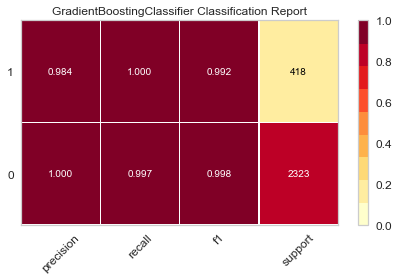

<AxesSubplot:title={'center':'GradientBoostingClassifier Classification Report'}>

In [81]:
from yellowbrick.classifier import ClassificationReport

classes3 = ["0", "1"]

visualizer3 = ClassificationReport(
    model_gbt, classes=classes3, support=True, is_fitted=True
)

visualizer3.fit(X_train_sm, y_train_sm)
visualizer3.score(X_test, y_test)   
visualizer3.show()

**Confusion Matrix**

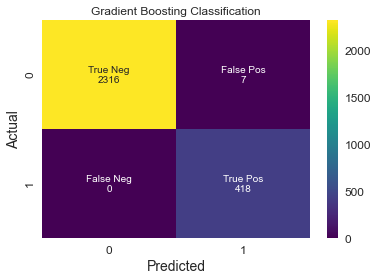

In [82]:
# Confusion Matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                gbt_corr.flatten()]

labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(gbt_corr, fmt = '',cmap = 'viridis', annot=labels);
title = "Gradient Boosting Classification"
ylabel = "Actual"
xlabel = "Predicted"
plt.title(title)
plt.ylabel(ylabel)
plt.xlabel(xlabel);

**PR Curve**

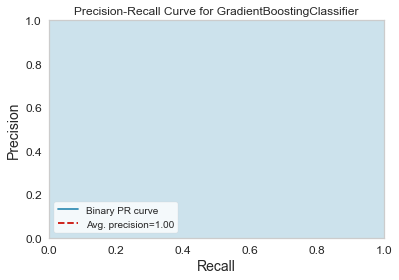

<AxesSubplot:title={'center':'Precision-Recall Curve for GradientBoostingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [83]:
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and show it
viz3 = PrecisionRecallCurve(model_gbt, is_fitted=True)
viz3.fit(X_train_sm, y_train_sm)
viz3.score(X_test, y_test)
viz3.show()

**ROC-AUC**

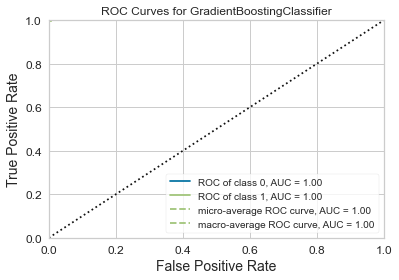

<AxesSubplot:title={'center':'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [84]:
visualizerroc3 = ROCAUC(
    model_gbt, classes=classes3, is_fitted=True
)

visualizerroc3.fit(X_train_sm, y_train_sm)
visualizerroc3.score(X_test, y_test)
visualizerroc3.show()

**Discrimintation Threshold**


This takes quite some time to run, so run it only when you have to write about the business insights.

In [85]:
#visualizer = DiscriminationThreshold(model_gbt, is_fitted=True)

#visualizer.fit(X_train_sm, y_train_sm)
#visualizer.poof()

**Feature Importance**

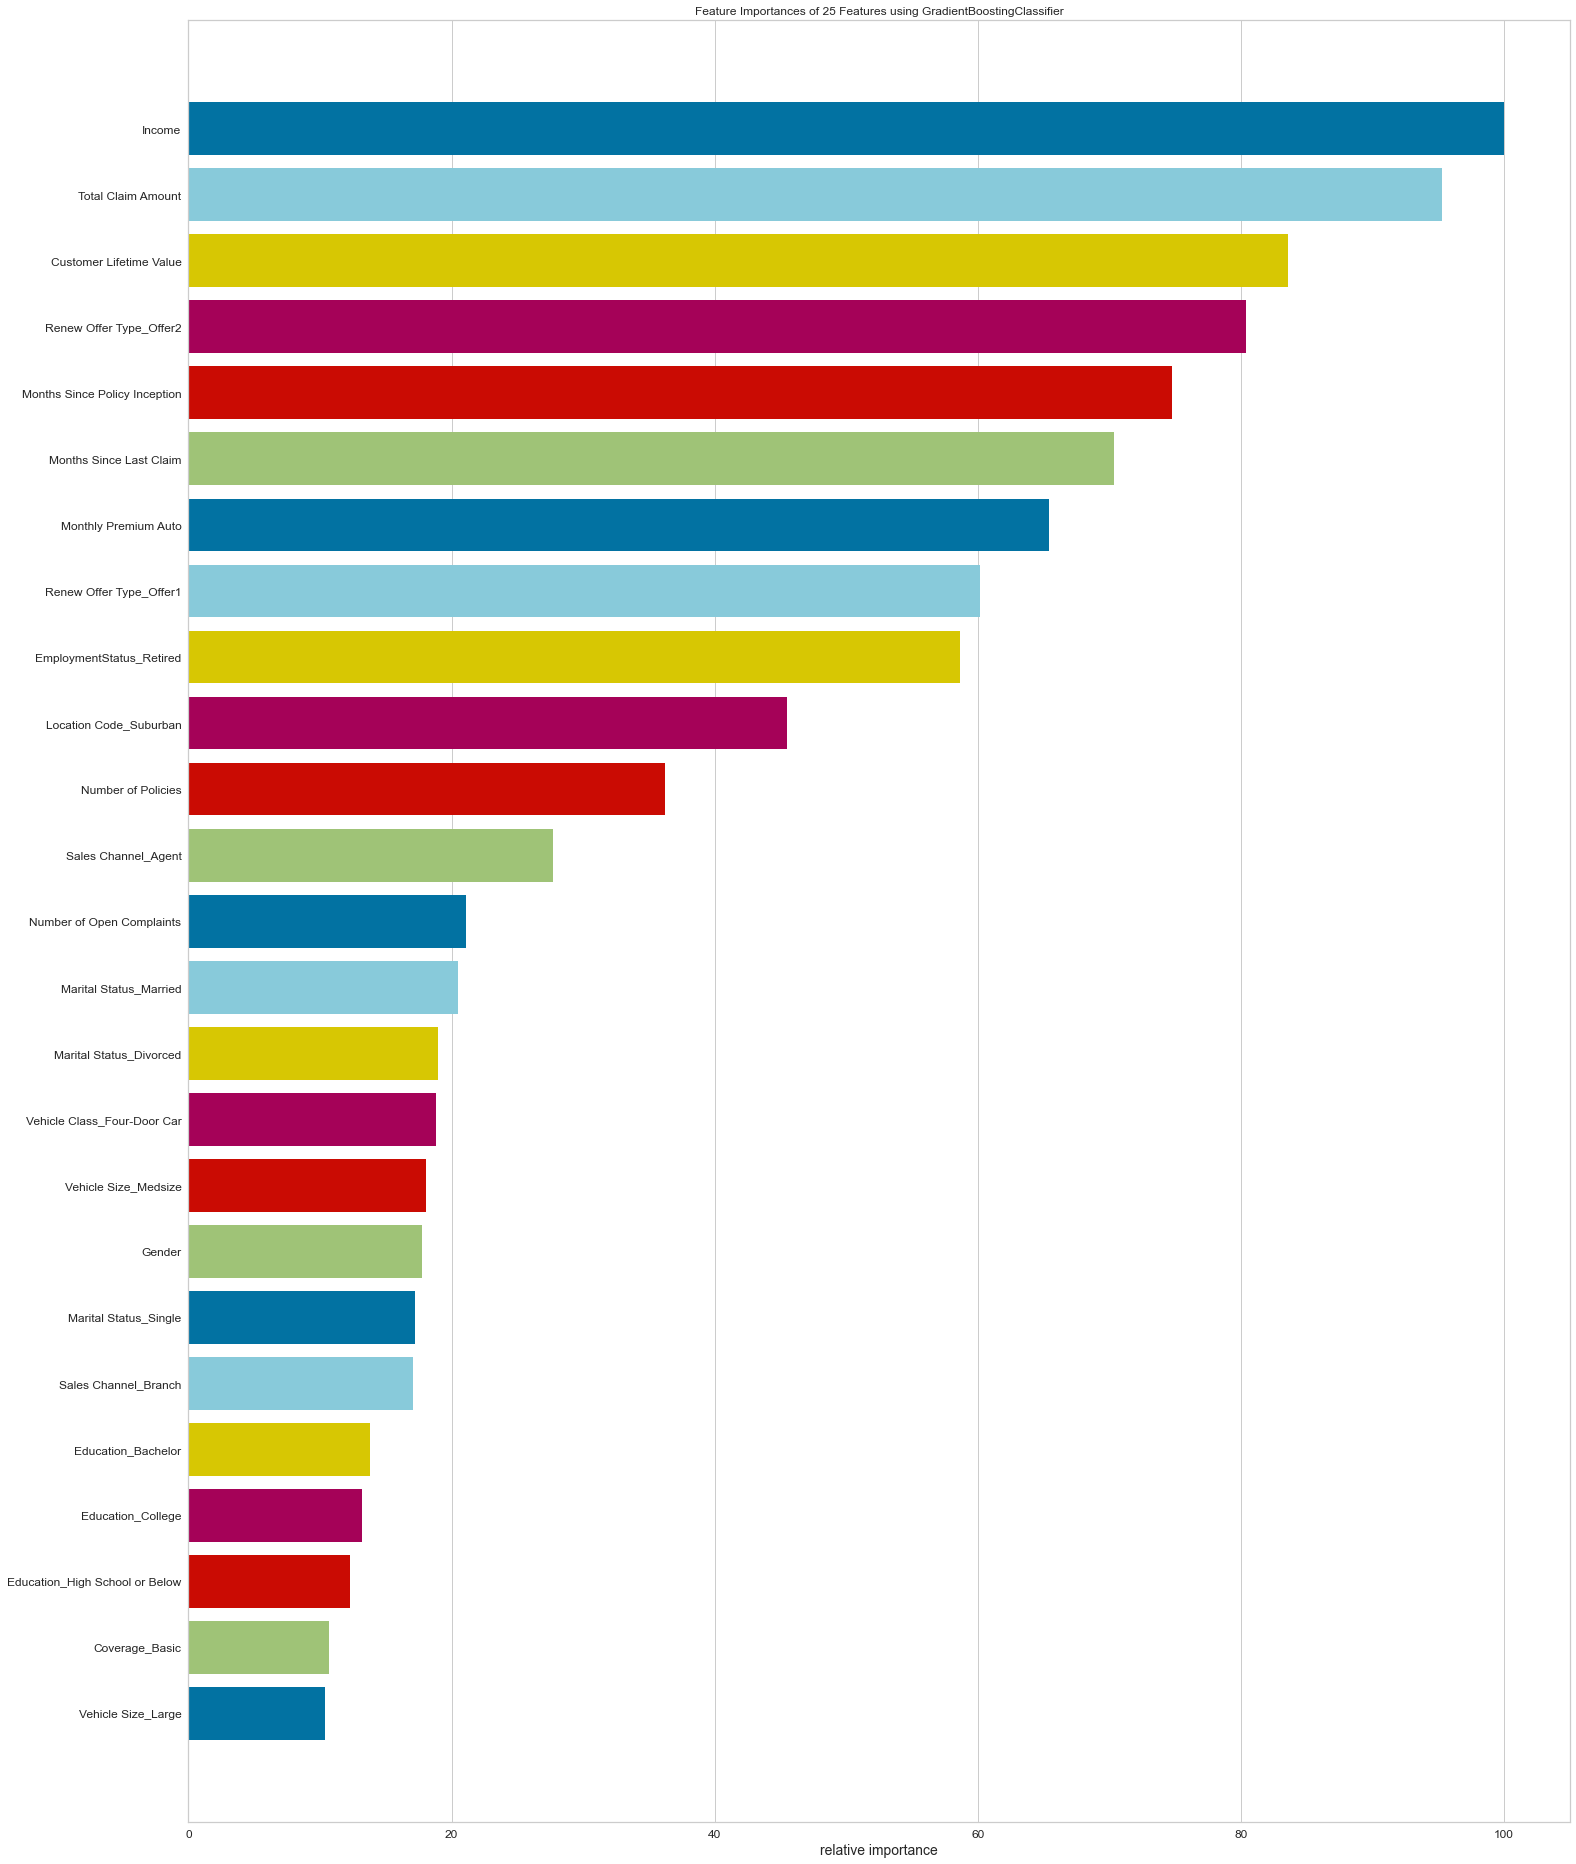

<AxesSubplot:title={'center':'Feature Importances of 25 Features using GradientBoostingClassifier'}, xlabel='relative importance'>

In [86]:
from yellowbrick.model_selection import FeatureImportances

fig = plt.figure(figsize=(22, 26))
viz2 = FeatureImportances(model_gbt, labels=X_train_sm.columns)
viz2.fit(X_train_sm, y_train_sm)
viz2.poof()

**XGBoost**

In [87]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [88]:
import xgboost as xgb

In [89]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_sm, y_train_sm)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:44:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
y_pred_xgb = xgb_model.predict(X_test)
xgb_corr = metrics.confusion_matrix(y_test, y_pred_xgb)
print("Accuracy_Score: {}".format(accuracy_score(y_test,y_pred_xgb)))
print("Precision_Score: {}".format(precision_score(y_test,y_pred_gbt)))
print("Recall_Score: {}".format(recall_score(y_test,y_pred_xgb)))
print("F1_Score: {}".format(metrics.f1_score(y_test,y_pred_xgb)))

Accuracy_Score: 0.9861364465523531
Precision_Score: 0.9835294117647059
Recall_Score: 1.0
F1_Score: 0.9565217391304348


**Classification Report**

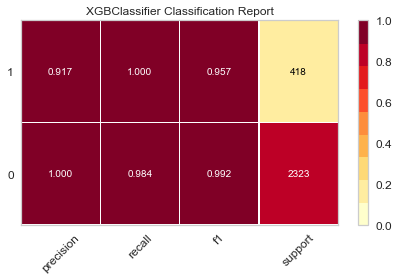

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

In [91]:
from yellowbrick.classifier import ClassificationReport

classes4 = ["0", "1"]

visualizer4 = ClassificationReport(
    xgb_model, classes=classes3, support=True, is_fitted=True
)

visualizer4.fit(X_train_sm, y_train_sm)
visualizer4.score(X_test, y_test)   
visualizer4.show()

**Confusion Matrix**

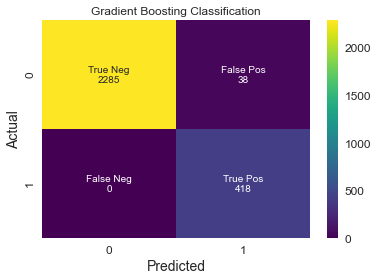

In [92]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                xgb_corr.flatten()]

labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(xgb_corr, fmt = '',cmap = 'viridis', annot=labels);
title = "Gradient Boosting Classification"
ylabel = "Actual"
xlabel = "Predicted"
plt.title(title)
plt.ylabel(ylabel)
plt.xlabel(xlabel);

**PR Curve**

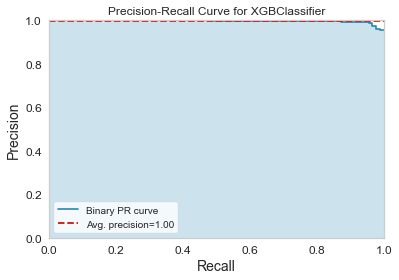

<AxesSubplot:title={'center':'Precision-Recall Curve for XGBClassifier'}, xlabel='Recall', ylabel='Precision'>

In [93]:
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and show it
viz4 = PrecisionRecallCurve(xgb_model, is_fitted=True)
viz4.fit(X_train_sm, y_train_sm)
viz4.score(X_test, y_test)
viz4.show()

**ROC-AUC**

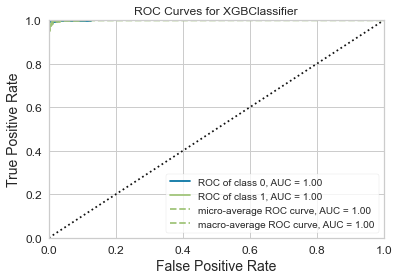

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [94]:
visualizerroc4 = ROCAUC(
    xgb_model, classes=classes4, is_fitted=True
)

visualizerroc4.fit(X_train_sm, y_train_sm)
visualizerroc4.score(X_test, y_test)
visualizerroc4.show()

**Feature Importance**

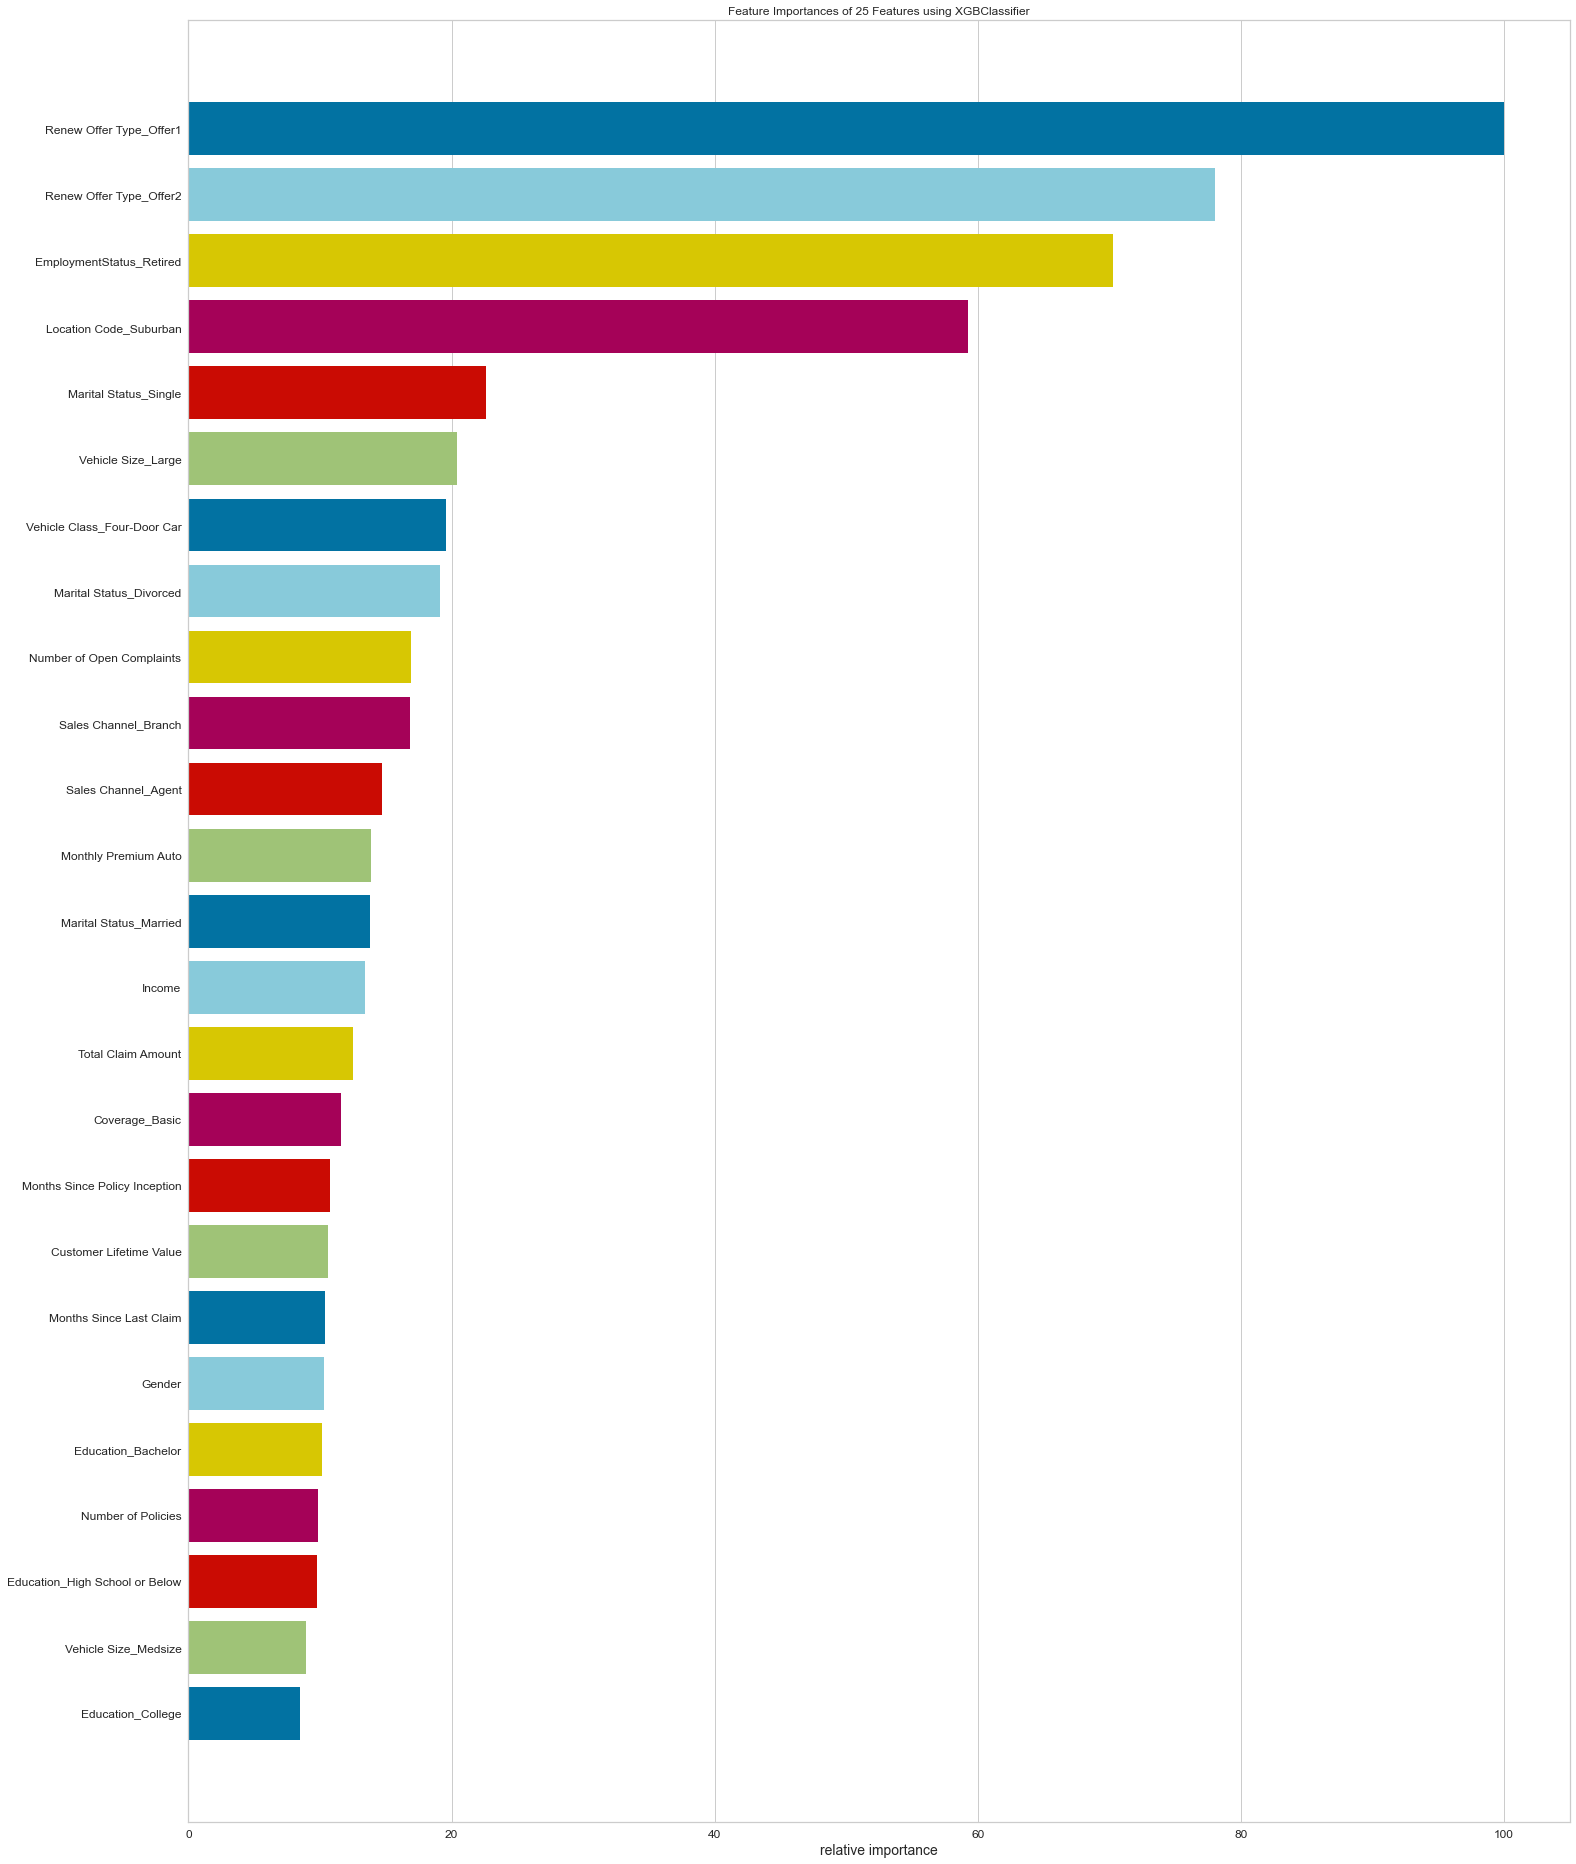

<AxesSubplot:title={'center':'Feature Importances of 25 Features using XGBClassifier'}, xlabel='relative importance'>

In [95]:
from yellowbrick.model_selection import FeatureImportances

fig = plt.figure(figsize=(22, 26))
viz4 = FeatureImportances(xgb_model, labels=X_train_sm.columns)
viz4.fit(X_train_sm, y_train_sm)
viz4.poof()

**Discrimintation Threshold**


This takes quite some time to run, so run it only when you have to write about the business insights.

In [96]:
#visualizer = DiscriminationThreshold(xgb_model, is_fitted=True)

#visualizer.fit(X_train_sm, y_train_sm)
#visualizer.poof()

**Summary of Model Scores**

In [97]:
df = {'Models': ["Logistic Regression","Random Forest Classifier","Gradient Boosting Classifier", 'XG Boost'],
     'Accuracy Scores': [70.15,97.37,99.67,98.61],
     'Precision Score': [29.67,86.65,97.89,97.89],
     'Recall Score': [69.85,97.84,100.00,100.00],
     'F1 Score': [41.65,91.91,98.93,95.65]}

summary = pd.DataFrame(df)

In [98]:
summary

Models  Accuracy Scores  Precision Score  \
0           Logistic Regression            70.15            29.67   
1      Random Forest Classifier            97.37            86.65   
2  Gradient Boosting Classifier            99.67            97.89   
3                      XG Boost            98.61            97.89   

   Recall Score  F1 Score  
0         69.85     41.65  
1         97.84     91.91  
2        100.00     98.93  
3        100.00     95.65

Text(0, 0.5, 'Models')

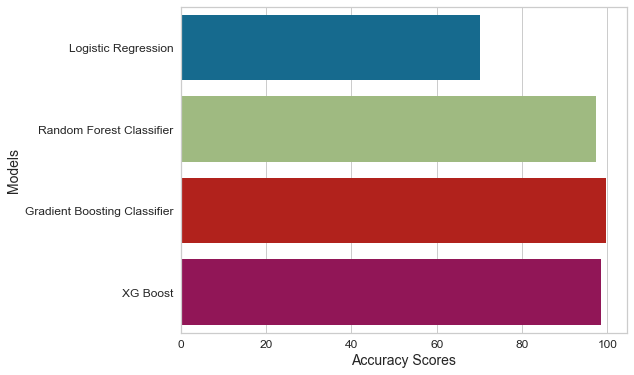

In [99]:
plt.figure(figsize=(8, 6))
splot=sns.barplot(x="Accuracy Scores",y="Models",data=summary)
plt.xlabel("Accuracy Scores", size=14)
plt.ylabel("Models", size=14)

# Clustering - KMeans

In [100]:
clv_cluster = pd.read_csv(r"C:\Users\pnguy\OneDrive\Documents\GitHub\Auto_Insurance_Enterprise\Data\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

X = clv_cluster[['Customer Lifetime Value','Income','Monthly Premium Auto','Total Claim Amount']]

#Standardizing

X_std = standardizer.fit_transform(X)

#Building cluster - KMeans

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
clustermodel = kmeans.fit(X_std)
clusterlabels = clustermodel.predict(X_std)


['Customer Lifetime Value','Income','Monthly Premium Auto','Total Claim Amount','Monthly Premium Auto',
                'Months Since Last Claim','Months Since Policy Inception','Number of Open Complaints','Number of Policies']

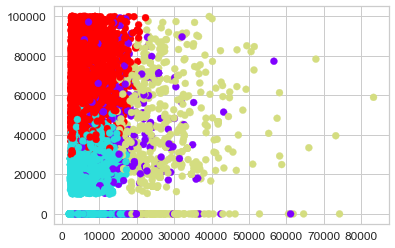

In [101]:
#Plot cluster for CLV vs Income

from matplotlib import pyplot

pyplot.scatter(clv_cluster['Customer Lifetime Value'],clv_cluster['Income'],c=clusterlabels, cmap='rainbow')

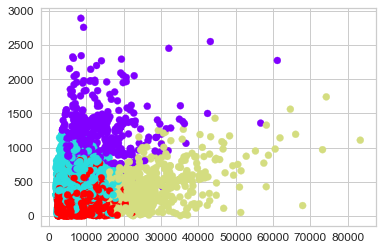

In [102]:
#Plot cluster for CLV vs Total Claim Amount

pyplot.scatter(clv_cluster['Customer Lifetime Value'],clv_cluster['Total Claim Amount'],c=clusterlabels, cmap='rainbow')

## Elbow

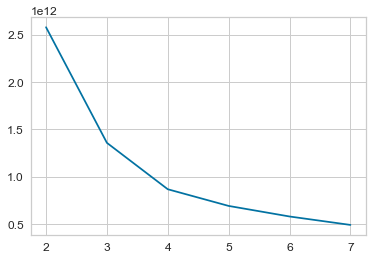

In [103]:
withinss=[]
for i in range(2,8):
    kmeans2 = KMeans(n_clusters=i)
    elbow_model = kmeans2.fit(X)
    withinss.append(elbow_model.inertia_)


pyplot.plot([2,3,4,5,6,7],withinss)

## Silhouette

In [104]:
from sklearn.metrics import silhouette_samples
silhouette_samples(X,clusterlabels)

array([0.524144  , 0.46507855, 0.28627544, ..., 0.45142418, 0.42203209,
       0.48892746])

In [105]:
from sklearn.metrics import silhouette_score
silhouette_score(X,clusterlabels)

0.3243149085510982

In [109]:
import pandas as pd


from sklearn.metrics import silhouette_samples
silhouette_samples(X,clusterlabels)
silhouette=silhouette_samples(X,clusterlabels)


d = {'label': labels, 'silhouette': silhouette}

sil_df = pd.DataFrame(data=d)
sil_df

Exception: Data must be 1-dimensional

In [110]:
d

{'label': array([['True Neg\n2285', 'False Pos\n38'],
        ['False Neg\n0', 'True Pos\n418']], dtype='<U13'),
 'silhouette': array([0.524144  , 0.46507855, 0.28627544, ..., 0.45142418, 0.42203209,
        0.48892746])}

In [111]:
import numpy as np

print('Average Silhouette Score for Cluster 0: ',np.average(df[df['label'] == 0].silhouette))
print('Average Silhouette Score for Cluster 1: ',np.average(df[df['label'] == 1].silhouette))
print('Average Silhouette Score for Cluster 2: ',np.average(df[df['label'] == 2].silhouette))
print('Average Silhouette Score for Cluster 3: ',np.average(df[df['label'] == 3].silhouette))

KeyError: 'label'

In [112]:
centers = clustermodel.cluster_centers_
centers

array([[ 0.67215221, -0.34007868,  2.56057015,  2.34077709],
       [-0.28506436, -0.75885923, -0.18737442,  0.13388041],
       [ 2.76045927, -0.02562546,  0.29202324,  0.04207513],
       [-0.24392115,  0.94103169, -0.25524393, -0.54965298]])

In [113]:
centers_df = pd.DataFrame(centers, columns = X.columns)
centroids = pd.DataFrame(standardizer.inverse_transform(centers), columns=X.columns)

In [114]:
centers_df

Customer Lifetime Value    Income  Monthly Premium Auto  Total Claim Amount
0                 0.672152 -0.340079              2.560570            2.340777
1                -0.285064 -0.758859             -0.187374            0.133880
2                 2.760459 -0.025625              0.292023            0.042075
3                -0.243921  0.941032             -0.255244           -0.549653

In [115]:
centroids

Customer Lifetime Value        Income  Monthly Premium Auto  \
0             12623.023722  27326.387789            181.318482   
1              6046.379746  14604.570824             86.772471   
2             26970.928402  36878.923577            103.266667   
3              6329.057886  66244.268086             84.437346   

   Total Claim Amount  
0         1114.047528  
1          472.978936  
2          446.310954  
3          274.423295

## LIGHTGBM FOR CLASSIFICATION

In [116]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [117]:
import lightgbm
print(lightgbm.__version__)

3.1.1


In [127]:
# lightgbm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=24, n_informative=5, n_redundant=5, random_state=1)

In [163]:

# fit the model on the whole dataset
lgbm_class_model = LGBMClassifier()
lgbm_class_model.fit(X_train, y_train)

#Testing
lgbm_class_pred = lgbm_class_model.predict(X_test)
lgbm_class_mse = mean_squared_error(y_test, lgbm_class_pred)
lgbm_class_rmse = np.sqrt(lgbm_class_mse)
lgbm_class_rmse

0.09924927987097422

## LIGHTGBM FOR REGRESSION

In [161]:

# lightgbm for regression
from sklearn.metrics import mean_squared_error
import numpy as np
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)




In [162]:

# fit the model on the whole dataset
lgbm_reg_model = LGBMRegressor()
lgbm_reg_model.fit(X_train, y_train)

#Testing
lgbm_reg_pred = lgbm_reg_model.predict(X_test)
lgbm_reg_mse = mean_squared_error(y_test, lgbm_reg_pred)
lgbm_reg_rmse = np.sqrt(lgbm_reg_mse)
lgbm_reg_rmse

0.19527053240816442

Customer Lifetime Value  Response  Gender  Income  Monthly Premium Auto  \
3277              10507.69496         0       1   20043                    92   

      Months Since Last Claim  Months Since Policy Inception  \
3277                       13                              9   

      Number of Open Complaints  Number of Policies  Total Claim Amount  ...  \
3277                          0                   2          516.088544  ...   

      Sales Channel_Web  Vehicle Class_Four-Door Car  \
3277                  0                            1   

      Vehicle Class_Luxury Car  Vehicle Class_Luxury SUV  Vehicle Class_SUV  \
3277                         0                         0                  0   

      Vehicle Class_Sports Car  Vehicle Class_Two-Door Car  \
3277                         0                           0   

      Vehicle Size_Large  Vehicle Size_Medsize  Vehicle Size_Small  
3277                   0                     1                   0  

[1 rows x 60 columns]